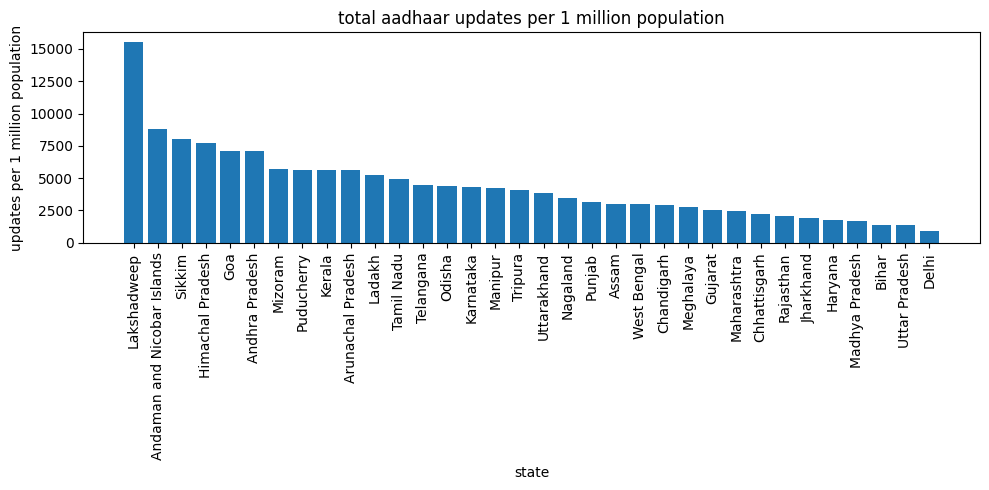

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- total updates ----------------

demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

updates=(
    pd.concat([demographic_df,biometric_df])
    .groupby("state")
    .size()
    .rename("total_updates")
    .reset_index()
)

# ---------------- population ----------------

population=pd.read_csv("../sql/data/Population of Indian states 2025.csv")

population=population.rename(columns={
    "State/UT":"state",
    "Population 2025":"population"
})

population["population"]=(
    population["population"]
    .astype(str)
    .str.replace(",","")
    .astype(int)
)

# ---------------- merge ----------------

df=updates.merge(population,on="state",how="inner")

# updates per 1 million population
df["updates_per_million"]=(df["total_updates"]/df["population"])*1_000_000
df=df.sort_values("updates_per_million",ascending=False)

# ---------------- plot ----------------

plt.figure(figsize=(10,5))
plt.bar(df["state"],df["updates_per_million"])
plt.xticks(rotation=90)
plt.xlabel("state")
plt.ylabel("updates per 1 million population")
plt.title("total aadhaar updates per 1 million population")
plt.tight_layout()
plt.show()
